In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [156]:
#importing data#
df_kc= pd.read_csv('kc_house_data.csv') # the data is retrieved from king county house prices,USA,https://www.kaggle.com/harlfoxem/housesalesprediction
df_kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [157]:
# data cleaning #
#removing unnecessary columns#
df=df_kc.drop(['id', 'date', 'sqft_lot','view', 'sqft_above', 'sqft_basement','yr_renovated', 'sqft_living15', 'sqft_lot15','lat','long'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade,yr_built,zipcode
0,221900.0,3,1.00,1180,1.0,0,3,7,1955,98178
1,538000.0,3,2.25,2570,2.0,0,3,7,1951,98125
2,180000.0,2,1.00,770,1.0,0,3,6,1933,98028
3,604000.0,4,3.00,1960,1.0,0,5,7,1965,98136
4,510000.0,3,2.00,1680,1.0,0,3,8,1987,98074


In [158]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'condition', 'grade', 'yr_built', 'zipcode'],
      dtype='object')

In [159]:
#printing the features/variables#
#converting string to float#

df['price'] = df['price'].astype(float)

In [160]:
df['bedrooms'] = df['bedrooms'].astype(float)

In [161]:
df['bathrooms'] = df['bathrooms'].astype(float)

In [162]:
df['sqft_living'] = df['sqft_living'].astype(float)

In [163]:
df['condition'] = df['condition'].astype(float)

In [164]:
df['grade'] = df['grade'].astype(float)

In [165]:
df['floors'] = df['floors'].astype(float)

In [166]:
df['waterfront'] = df['waterfront'].astype(float)

In [167]:
df['yr_built'] = df['yr_built'].astype(float)

In [168]:
df['zipcode'] = df['zipcode'].astype(float)

In [169]:
#Price overview
print('Price Min:')
print(df['price'].min())
print('Price Max:')
print(df['price'].max())
print('Price Mean:')
print(df['price'].mean())
print("Price Median:")
print(df['price'].median())
print("Price Std:")
print(df['price'].std())

Price Min:
75000.0
Price Max:
7700000.0
Price Mean:
540088.1417665294
Price Median:
450000.0
Price Std:
367127.1964826997


In [170]:
#sqft_living overview
print('sqft_living Min:')
print(df['sqft_living'].min())
print('sqft_living Max:')
print(df['sqft_living'].max())
print('sqft_living Mean:')
print(df['sqft_living'].mean())
print("sqft_living Median:")
print(df['sqft_living'].median())
print("sqft_living Std:")
print(df['sqft_living'].std())

sqft_living Min:
290.0
sqft_living Max:
13540.0
sqft_living Mean:
2079.8997362698374
sqft_living Median:
1910.0
sqft_living Std:
918.4408970468115


In [171]:
# plotting scatterplot between sqft_living and price using "bokeh"#

from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show
from bokeh.models import Range1d

x = df['sqft_living']
y = df['price']

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)
p = figure(plot_width=800, plot_height=600, x_range=(0,11000))
p.y_range = Range1d(0,8000000)
p.scatter(x, y,
          fill_color="red", fill_alpha=0.6,
          line_color=None)
print('Price Max:')
print(df['price'].max())

print('sqft_living Max:')
print(df['sqft_living'].max())

output_file("scatter.html", title="df_scatter.py")
show(p)
output_notebook()

Price Max:
7700000.0
sqft_living Max:
13540.0


Loading BokehJS ...

Grade count:
7.0     8981
8.0     6068
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      90
4.0       29
13.0      13
3.0        3
1.0        1
Name: grade, dtype: int64


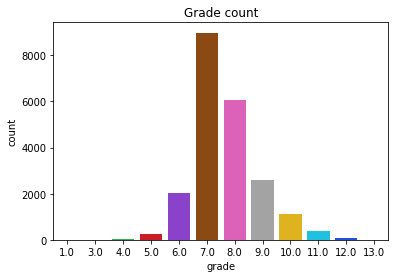

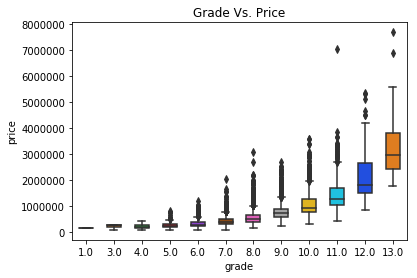

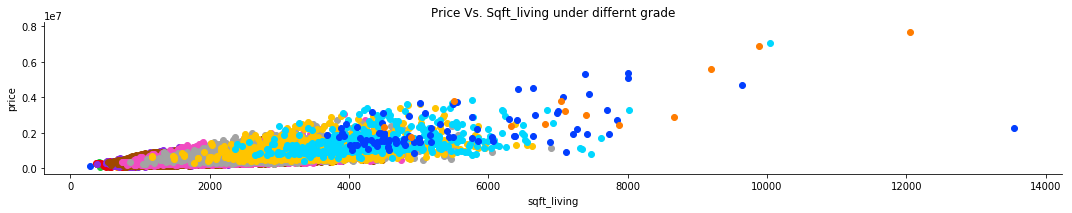

In [172]:
#Grade vs.Price(Sqft_living)
grade = df['grade'].value_counts()
print('Grade count:')
print(grade)

sns.countplot(x = 'grade',data = df,palette = "bright")
plt.title('Grade count')
plt.show()

sns.boxplot(x = 'grade',y = 'price',data = df,orient='v',width= 0.5,palette = "bright")
plt.title('Grade Vs. Price')
plt.show()

sns.FacetGrid(data = df,hue = 'grade', aspect=5,palette = "bright").map(plt.scatter,'sqft_living','price')
plt.title('Price Vs. Sqft_living under differnt grade')
plt.show()



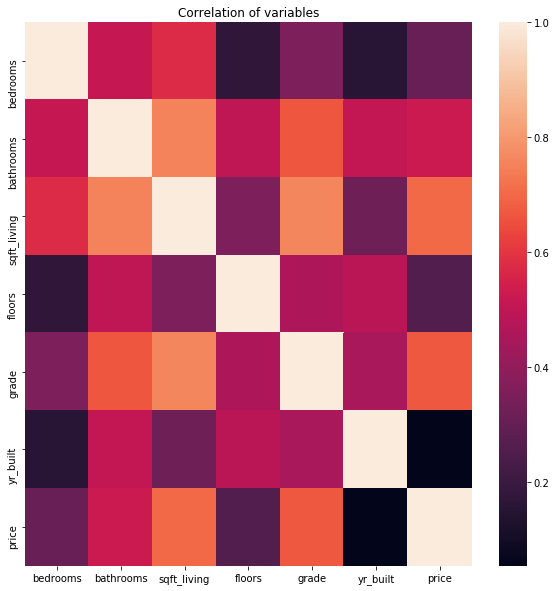

In [173]:
#Correlation matrix
corr = df[['bedrooms','bathrooms','sqft_living','floors','grade','yr_built','price']]
 

plt.figure(figsize=(10,10))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0)
plt.show()



In [174]:
#Feature Engineering#

numerical_features = ['price' , 'bedrooms' , 'sqft_living','floors', 'waterfront', 'condition', 'grade', 'yr_built', 'zipcode']

In [175]:
#Let's check if there are any missing values in the numerical data.
df[numerical_features].isnull().sum()

price          0
bedrooms       0
sqft_living    0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
zipcode        0
dtype: int64

In [176]:
print('Numerical Features:',len(numerical_features))

Numerical Features: 9


In [177]:
df = df.convert_objects(convert_numeric=True)

C:\Users\burra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [178]:
#Splitting the Dataset into training and test set#

from sklearn.cross_validation import train_test_split

import math


In [179]:
X = df.drop('price',axis=1).values
y = df['price'].values


In [180]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_X = LabelEncoder()
X[:,0] = label_X.fit_transform(X[:,0])
encoder = OneHotEncoder(categorical_features = [0])
X = encoder.fit_transform(X).toarray()

In [181]:

train_X, test_X, train_y, test_y = train_test_split(X,y,
                                                  test_size = 0.3,
                                                  random_state = 0)

In [182]:
#Linear Regression#

#Fitting Linear Regression to Training set#

from sklearn.linear_model import LinearRegression
from sklearn import metrics

regr = LinearRegression()
regr.fit( train_X, train_y )


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [183]:
#predecting the test set results
y_pred = regr.predict(test_X)

In [184]:
#Evaluation Metrics#

def model_evaluate( model_ ):
  pred_df = pd.DataFrame( { "actual": test_y, "predicted" : model_.predict( test_X ) } )
  pred_df['resid'] = pred_df.actual - pred_df.predicted
  rmse = np.sqrt( metrics.mean_squared_error( pred_df.actual, pred_df.predicted ) )
  r2 = metrics.r2_score( pred_df.actual, pred_df.predicted )
  print( "RMSE: ", rmse, " : ", "R Squared: ", r2 )
  return pred_df, rmse, r2

In [185]:

pred_df, rmse, r2 = model_evaluate(regr)

RMSE:  222512.65256175792  :  R Squared:  0.639367931187453


In [186]:
pred_df[0:5]

,actual,predicted,resid
0,297000.0,3.206768e+05,-23676.827016
1,1578000.0,1.520229e+06,57770.817610
2,562100.0,5.500467e+05,12053.336345
3,631500.0,6.140400e+05,17459.971310
4,780000.0,7.726098e+05,7390.199361


C:\Users\burra\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\burra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


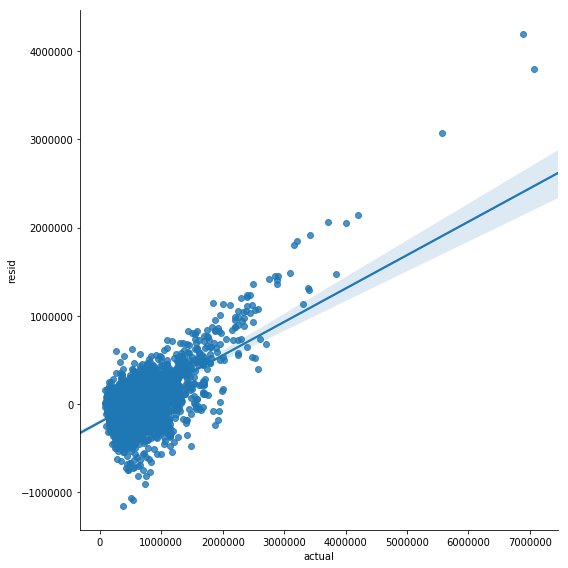

In [187]:
#Residual Pattern#
sns.lmplot( 'actual', 'resid', data = pred_df, size = 8 )

C:\Users\burra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


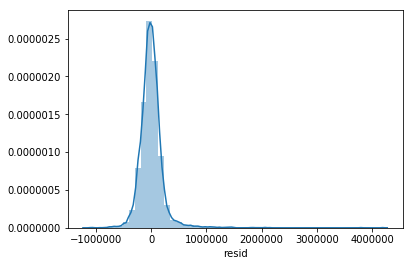

In [188]:
sns.distplot( pred_df.resid )

In [189]:
#The residual plot depicts the residuals are not random. They increase as the house prices increase.
#This might be becuase of the outliers in prices,multicolinearity,non linear relationship between price and it's predictors#

In [190]:
# Ensemble methods#

from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor # Ensemble methods




In [191]:
#Random Forest Regression#

from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(train_X, train_y)
print('Random forest score:',RF.score(test_X, test_y))


Random forest score: 0.7934032044930601


In [192]:
#Gradient Boost Regression#

from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(train_X, train_y)
print('Gradient Boosting',GB.score(test_X, test_y))

Gradient Boosting 0.80852410507374


In [193]:
## Gradient Boost Regression has the better score i.e with high accuracy of 80%. 
##Typically predicting house prices is a difficult problem and may not be influencd by many external macro economic factors,
#which are not captured. But predicting 80% accuracy is also useful which helps understand the factors that influencing 
#the prices most.